In [21]:
## 200    OK
## 304    Not Modified
## 302    temporary redirect
## 404    Not Found
## 500    Internal Server Error
## 403    Forbidden
## 501    Not Implemented

#### The GET method requests a representation of the specified resource. Requests using GET should only retrieve data.
#### The HEAD method asks for a response identical to that of a GET request, but without the response body.
#### The POST method is used to submit an entity to the specified resource, often causing a change in state or side effects on the server

In [1]:
import pandas as pd

In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette() 
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

# for seaborn issue:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action="ignore")
%precision 4

from datetime import datetime
from datetime import date

from dateutil.relativedelta import relativedelta

In [3]:
import re

In [5]:
## Listing all active dataframe in memory
#alldfs = [var for var in dir() if isinstance(eval(var), pd.core.frame.DataFrame)]
alldfs = [var for var in dir() if isinstance(eval(var), np.ndarray)]
#alldfs = [var for var in dir() if isinstance(eval(var), defaultdict)]
#alldfs = [var for var in dir() if isinstance(eval(var), list)]
print(alldfs)

[]


In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Combines files and create new features

In [24]:
df=pd.read_csv('/Users/sri.t/Downloads/nasa_19950731.22-19950831.22.tsv.gz',sep='\t',encoding='latin 1')

In [39]:
df1=pd.read_csv('/Users/sri.t/Downloads/nasa_19950630.22-19950728.12.tsv.gz',sep='\t',encoding='latin 1')

In [26]:
df.shape

(1569886, 9)

In [46]:
df1.shape

(1891709, 7)

In [234]:
print (len(df1['url'].unique()))
print (len(df['url'].unique()))

21220
15356


In [236]:
print (len(df1['host'].unique()))
print(len(df['host'].unique()))

81982
75060


#### Convert time time to datetime format

In [42]:
df['time']=pd.to_datetime(df['time'],unit='s')

In [ ]:
df1['time']=pd.to_datetime(df1['time'],unit='s')

#### Drop empty columns

In [47]:
df.drop(columns=['referer','useragent','logname'],axis=1,inplace=True)

In [45]:
df1.drop(columns=['referer','useragent','logname'],axis=1,inplace=True)

#### Create various based features

In [57]:
df['year']=[x.year for x in df['time']]
df['month']=[x.month for x in df['time']]
df['day']=[x.day for x in df['time']]
df['hour']=[x.hour for x in df['time']]
df['minute']=[x.minute for x in df['time']]
df['second']=[x.second for x in df['time']]

In [61]:
df1['year']=[x.year for x in df1['time1']]
df1['month']=[x.month for x in df1['time1']]
df1['day']=[x.day for x in df1['time1']]
df1['hour']=[x.hour for x in df1['time1']]
df1['minute']=[x.minute for x in df1['time1']]
df1['second']=[x.second for x in df1['time1']]

#### Get last file type and file type extension

In [181]:
def f1(x):
    g=re.match(".*/(.+)", str(x))
    if g:
        return g.group(1)
    else:
        return ''

In [185]:
def f2(x):
    g=re.match(".*\.(.+)", str(x))
    if g:
        return g.group(1)
    else:
        return ''

In [183]:
df['file_type']=df[['url']].apply(f1,axis=1)
df['file_type_ext']=df[['file_type']].apply(f2,axis=1)

In [201]:
df1['file_type']=df1[['url']].apply(f1,axis=1)
df1['file_type_ext']=df1[['file_type']].apply(f2,axis=1)

#### Sort and concatenate the files

In [213]:
df=df.sort_values(by=['host','time'])

In [223]:
df1=df1.sort_values(by=['host','time'])

In [241]:
df1.head()

,host,method,url,response,bytes,time,year,month,day,hour,minute,second,file_type,file_type_ext
727798,***.novo.dk,GET,/ksc.html,200,7067,1995-07-11 12:17:09,1995,7,11,12,17,9,ksc.html,html
727799,***.novo.dk,GET,/images/ksclogo-medium.gif,200,5866,1995-07-11 12:17:11,1995,7,11,12,17,11,ksclogo-medium.gif,gif
727822,***.novo.dk,GET,/images/MOSAIC-logosmall.gif,200,363,1995-07-11 12:17:31,1995,7,11,12,17,31,MOSAIC-logosmall.gif,gif
727826,***.novo.dk,GET,/images/USA-logosmall.gif,200,234,1995-07-11 12:17:33,1995,7,11,12,17,33,USA-logosmall.gif,gif
727828,***.novo.dk,GET,/images/NASA-logosmall.gif,200,786,1995-07-11 12:17:34,1995,7,11,12,17,34,NASA-logosmall.gif,gif


In [240]:
df.head()

,host,time,method,url,response,bytes,year,month,day,hour,minute,second,file_type,file_type_ext
321368,***.novo.dk,1995-08-09 07:02:48,GET,/shuttle/missions/sts-69/mission-sts-69.html,200,11264,1995,8,9,7,2,48,mission-sts-69.html,html
321374,***.novo.dk,1995-08-09 07:02:55,GET,/shuttle/missions/sts-69/sts-69-patch-small.gif,200,8083,1995,8,9,7,2,55,sts-69-patch-small.gif,gif
321383,***.novo.dk,1995-08-09 07:03:02,GET,/images/KSC-logosmall.gif,200,1204,1995,8,9,7,3,2,KSC-logosmall.gif,gif
321385,***.novo.dk,1995-08-09 07:03:06,GET,/images/launch-logo.gif,200,1713,1995,8,9,7,3,6,launch-logo.gif,gif
321386,***.novo.dk,1995-08-09 07:03:12,GET,/history/apollo/images/apollo-logo1.gif,200,1173,1995,8,9,7,3,12,apollo-logo1.gif,gif


In [242]:
df_all=pd.concat([df1,df])

In [243]:
df_all.shape

(3461595, 14)

In [253]:
df_all=df_all.sort_values(by=['host','time'])

#### Determine first entry and log entries with in a day (variables are count and count_day)

In [263]:
df_all['count_day']=df_all.groupby(['host','day']).cumcount() + 1

In [ ]:
df_all['count']=df_all.groupby('host').cumcount() + 1

In [283]:
df_all.head()

,bytes,day,file_type,file_type_ext,host,hour,method,minute,month,response,second,time,url,year,count,count_day,date,dates_unique
0,7067,11,ksc.html,html,***.novo.dk,12,GET,17,7,200,9,1995-07-11 12:17:09,/ksc.html,1995,1,1,1995-07-11,2
1,5866,11,ksclogo-medium.gif,gif,***.novo.dk,12,GET,17,7,200,11,1995-07-11 12:17:11,/images/ksclogo-medium.gif,1995,2,2,1995-07-11,2
2,363,11,MOSAIC-logosmall.gif,gif,***.novo.dk,12,GET,17,7,200,31,1995-07-11 12:17:31,/images/MOSAIC-logosmall.gif,1995,3,3,1995-07-11,2
3,234,11,USA-logosmall.gif,gif,***.novo.dk,12,GET,17,7,200,33,1995-07-11 12:17:33,/images/USA-logosmall.gif,1995,4,4,1995-07-11,2
4,786,11,NASA-logosmall.gif,gif,***.novo.dk,12,GET,17,7,200,34,1995-07-11 12:17:34,/images/NASA-logosmall.gif,1995,5,5,1995-07-11,2


In [256]:
#Total number of distinct hosts
len(df_all['host'].unique())

137978

In [258]:
#Total number of distinct pages
len(df_all['url'].unique())

31065

In [265]:
#Maximum entries for a host in the entire period
print (df_all['count'].max())
#Maximum entries with in a day for the host
print (df_all['count_day'].max())

21988
1704


In [7]:
df_all[df_all['count_day']==1704]

,Unnamed: 0,host,bytes,day,file_type,file_type_ext,hour,method,minute,month,response,second,time,url,year,count,count_day,date,dates_unique,diff_minutes,time-1,session_id,index_x,day_of_week,index_y,date_hour,page_grouping
902198,902198,indy.gradient.com,34688,12,cdtclock.gif,gif,19,GET,47,7,200,46,1995-07-12 19:47:46,/shuttle/countdown/images/cdtclock.gif,1995,2344,1704,1995-07-12 00:00:00,33,0.0,1995-07-12 19:47:46,7,P316,Wednesday,U16232,1995-07-12 19:01:01,shuttle mission pages


In [270]:
#Create just date from datetime variable
df_all['date']=[x.date() for x in df_all['time']]

In [47]:
#Create day of week from date column
df_all['day_of_week']=df_all['date'].dt.weekday_name 

In [26]:
#Create datehour time slice
def date_hour(x):
    return datetime(x['year'],x['month'],x['day'],x['hour'],1,1)

In [27]:
#Create a new time slice of date and hour
df_all['date_hour']=df_all[['year','month','day','hour']].apply(date_hour,axis=1)

In [275]:
#Determine how many unique days for each hosts
x=pd.DataFrame(df_all.groupby('host').date.nunique()).reset_index()

In [280]:
x.columns=['host','dates_unique']

In [281]:
df_all=df_all.merge(x,on='host',how='inner')

#### Create session ID to understand user behavior 

In [335]:
df_all['time-1']=df_all['time'].shift(1)

In [336]:
def f3(x):
    return (x['time']-x['time-1']).seconds/60

In [337]:
df_all['diff_minutes']=df_all[['time','time-1']].apply(f3,axis=1)

In [340]:
def f4(x):
    if x['count']==1:
        return 0
    else:
        return x['diff_minutes']

In [341]:
df_all['diff_minutes']=df_all[['count','diff_minutes']].apply(f4,axis=1)

In [354]:
df_all.drop(columns='session_id',inplace=True,axis=1)

In [423]:
i=1

In [426]:
def f5(x):
    global i
    if ((x['diff_minutes']==0.0) &(x['count']==1)):
        i=1
        return i
    elif (x['diff_minutes']>60.0):
        i += 1
        return i
    else:
        return i

In [428]:
df_all['session_id']=df_all[['diff_minutes','count']].apply(f5,axis=1)

#### Create index of hosts and URL 

In [31]:
x=pd.DataFrame(df_all['url'].unique())

In [32]:
x.columns=['url']

In [33]:
x=x.reset_index()

In [34]:
x['index']=[x+1 for x in x['index']]

In [35]:
x['index']=['P'+str(x) for x in x['index']]

In [36]:
x.head()

,index,url
0,P1,/ksc.html
1,P2,/images/ksclogo-medium.gif
2,P3,/images/MOSAIC-logosmall.gif
3,P4,/images/USA-logosmall.gif
4,P5,/images/NASA-logosmall.gif


In [37]:
df_all=df_all.merge(x,on='url',how='inner')

In [61]:
y=pd.DataFrame(df_all['host'].unique())

In [62]:
y.columns=['host']

In [63]:
y=y.reset_index()

In [57]:
#y['index']=[x+1 for x in y['index']]

In [64]:
y['index']=['U'+str(x+1) for x in y['index']]

In [67]:
y.head()

,index,host
0,U1,***.novo.dk
1,U2,01-dynamic-c.wokingham.luna.net
2,U3,04-dynamic-c.rotterdam.luna.net
3,U4,04-dynamic-c.wokingham.luna.net
4,U5,07mb369b.uni-duisburg.de


In [68]:
df_all=df_all.merge(y,on='host',how='inner')

In [14]:
df_all.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [46]:
df_all['date'] = pd.to_datetime(df_all['date'])

In [47]:
df_all['day_of_week']=df_all['date'].dt.weekday_name 

In [15]:
df_all.head()

,bytes,day,file_type,file_type_ext,host,hour,method,minute,month,response,second,time,url,year,count,count_day,date,dates_unique,diff_minutes,time-1,session_id,index_x,day_of_week,index_y
0,7067,11,ksc.html,html,***.novo.dk,12,GET,17,7,200,9,1995-07-11 12:17:09,/ksc.html,1995,1,1,1995-07-11,2,0.000000,NaN,1,P1,Tuesday,U1
1,5866,11,ksclogo-medium.gif,gif,***.novo.dk,12,GET,17,7,200,11,1995-07-11 12:17:11,/images/ksclogo-medium.gif,1995,2,2,1995-07-11,2,0.033333,1995-07-11 12:17:09,1,P2,Tuesday,U1
2,363,11,MOSAIC-logosmall.gif,gif,***.novo.dk,12,GET,17,7,200,31,1995-07-11 12:17:31,/images/MOSAIC-logosmall.gif,1995,3,3,1995-07-11,2,0.333333,1995-07-11 12:17:11,1,P3,Tuesday,U1
3,234,11,USA-logosmall.gif,gif,***.novo.dk,12,GET,17,7,200,33,1995-07-11 12:17:33,/images/USA-logosmall.gif,1995,4,4,1995-07-11,2,0.033333,1995-07-11 12:17:31,1,P4,Tuesday,U1
4,786,11,NASA-logosmall.gif,gif,***.novo.dk,12,GET,17,7,200,34,1995-07-11 12:17:34,/images/NASA-logosmall.gif,1995,5,5,1995-07-11,2,0.016667,1995-07-11 12:17:33,1,P5,Tuesday,U1


In [42]:
df_all=df_all.set_index('host')

In [10]:
df_all['time']=pd.to_datetime(df_all['time'])

In [11]:
df_all['date']=[datetime.strptime(x, '%Y-%m-%d') for x in df_all['date']]

In [31]:
df_all.head()

,host,bytes,day,file_type,file_type_ext,hour,method,minute,month,response,second,time,url,year,count,count_day,date,dates_unique,diff_minutes,time-1,session_id,index_x,day_of_week,index_y,date_hour
0,***.novo.dk,7067,11,ksc.html,html,12,GET,17,7,200,9,1995-07-11 12:17:09,/ksc.html,1995,1,1,1995-07-11,2,0.000000,NaN,1,P1,Tuesday,U1,1995-07-11 12:01:01
1,***.novo.dk,5866,11,ksclogo-medium.gif,gif,12,GET,17,7,200,11,1995-07-11 12:17:11,/images/ksclogo-medium.gif,1995,2,2,1995-07-11,2,0.033333,1995-07-11 12:17:09,1,P2,Tuesday,U1,1995-07-11 12:01:01
2,***.novo.dk,363,11,MOSAIC-logosmall.gif,gif,12,GET,17,7,200,31,1995-07-11 12:17:31,/images/MOSAIC-logosmall.gif,1995,3,3,1995-07-11,2,0.333333,1995-07-11 12:17:11,1,P3,Tuesday,U1,1995-07-11 12:01:01
3,***.novo.dk,234,11,USA-logosmall.gif,gif,12,GET,17,7,200,33,1995-07-11 12:17:33,/images/USA-logosmall.gif,1995,4,4,1995-07-11,2,0.033333,1995-07-11 12:17:31,1,P4,Tuesday,U1,1995-07-11 12:01:01
4,***.novo.dk,786,11,NASA-logosmall.gif,gif,12,GET,17,7,200,34,1995-07-11 12:17:34,/images/NASA-logosmall.gif,1995,5,5,1995-07-11,2,0.016667,1995-07-11 12:17:33,1,P5,Tuesday,U1,1995-07-11 12:01:01


#### Group URL into high level grouping 

In [224]:
x = pd.DataFrame(df_all['url'].str.split("/").values.tolist())

In [241]:
x['page_grouping'].value_counts()

standard image pages     1207552
shuttle mission pages    1107378
past mission pages        488179
others                    463742
icon pages                110497
home page                  84247
Name: page_grouping, dtype: int64

In [237]:
def f7(x):
    if ('shuttle' in str(x).lower()):
        return 'shuttle mission pages'
    elif ('images' in str(x).lower()):
        return 'standard image pages'
    elif ('history' in str(x).lower()):
        return 'past mission pages'
    elif ('ksc.html' in str(x).lower()  or('ksc.hmtl' in str(x).lower()) or ('ksc.htlm' in str(x).lower()) or ('kcs.html' in str(x).lower())):
        return 'home page'
    elif ('icons' in str(x).lower()):
        return 'icon pages'
    else:
        return 'others'

In [238]:
x['page_grouping']=x[1].map(f7)

In [239]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,page_grouping
0,,ksc.html,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,home page
1,,images,ksclogo-medium.gif,None,None,None,None,None,None,None,None,None,None,None,None,None,None,standard image pages
2,,images,MOSAIC-logosmall.gif,None,None,None,None,None,None,None,None,None,None,None,None,None,None,standard image pages
3,,images,USA-logosmall.gif,None,None,None,None,None,None,None,None,None,None,None,None,None,None,standard image pages
4,,images,NASA-logosmall.gif,None,None,None,None,None,None,None,None,None,None,None,None,None,None,standard image pages


In [242]:
df_all['page_grouping']=x['page_grouping']

In [243]:
df_all.head()

,host,bytes,day,file_type,file_type_ext,hour,method,minute,month,response,second,time,url,year,count,count_day,date,dates_unique,diff_minutes,time-1,session_id,index_x,day_of_week,index_y,date_hour,page_grouping
0,***.novo.dk,7067,11,ksc.html,html,12,GET,17,7,200,9,1995-07-11 12:17:09,/ksc.html,1995,1,1,1995-07-11,2,0.00,NaN,1,P1,Tuesday,U1,1995-07-11 12:01:01,home page
1,***.novo.dk,5866,11,ksclogo-medium.gif,gif,12,GET,17,7,200,11,1995-07-11 12:17:11,/images/ksclogo-medium.gif,1995,2,2,1995-07-11,2,0.03,1995-07-11 12:17:09,1,P2,Tuesday,U1,1995-07-11 12:01:01,standard image pages
2,***.novo.dk,363,11,MOSAIC-logosmall.gif,gif,12,GET,17,7,200,31,1995-07-11 12:17:31,/images/MOSAIC-logosmall.gif,1995,3,3,1995-07-11,2,0.33,1995-07-11 12:17:11,1,P3,Tuesday,U1,1995-07-11 12:01:01,standard image pages
3,***.novo.dk,234,11,USA-logosmall.gif,gif,12,GET,17,7,200,33,1995-07-11 12:17:33,/images/USA-logosmall.gif,1995,4,4,1995-07-11,2,0.03,1995-07-11 12:17:31,1,P4,Tuesday,U1,1995-07-11 12:01:01,standard image pages
4,***.novo.dk,786,11,NASA-logosmall.gif,gif,12,GET,17,7,200,34,1995-07-11 12:17:34,/images/NASA-logosmall.gif,1995,5,5,1995-07-11,2,0.02,1995-07-11 12:17:33,1,P5,Tuesday,U1,1995-07-11 12:01:01,standard image pages


In [244]:
df_all.to_csv("/Users/sri.t/Desktop/nsas_logs.csv",header=True,sep=',',encoding='utf-8')

In [5]:
df_all=pd.read_csv('/Users/sri.t/Desktop/nsas_logs.csv',sep=',')

In [11]:
#df_grp=pd.read_csv('/Users/sri.t/Desktop/nsas_logs_grp.csv',sep=',')

In [6]:
print (df_all.shape)
#print (df_grp.shape)

(3461595, 27)


### Analysis

In [8]:
df_all['time']=pd.to_datetime(df_all['time'])

In [9]:
df_all['date_hour']=pd.to_datetime(df_all['date_hour'])

In [17]:
df_all['date']=pd.to_datetime(df_all['date'])

In [18]:
df_all.head()

,Unnamed: 0,host,bytes,day,file_type,file_type_ext,hour,method,minute,month,response,second,time,url,year,count,count_day,date,dates_unique,diff_minutes,time-1,session_id,index_x,day_of_week,index_y,date_hour,page_grouping
0,0,***.novo.dk,7067,11,ksc.html,html,12,GET,17,7,200,9,1995-07-11 12:17:09,/ksc.html,1995,1,1,1995-07-11,2,0.000000,NaN,1,P1,Tuesday,U1,1995-07-11 12:01:01,home page
1,1,***.novo.dk,5866,11,ksclogo-medium.gif,gif,12,GET,17,7,200,11,1995-07-11 12:17:11,/images/ksclogo-medium.gif,1995,2,2,1995-07-11,2,0.033333,1995-07-11 12:17:09,1,P2,Tuesday,U1,1995-07-11 12:01:01,standard image pages
2,2,***.novo.dk,363,11,MOSAIC-logosmall.gif,gif,12,GET,17,7,200,31,1995-07-11 12:17:31,/images/MOSAIC-logosmall.gif,1995,3,3,1995-07-11,2,0.333333,1995-07-11 12:17:11,1,P3,Tuesday,U1,1995-07-11 12:01:01,standard image pages
3,3,***.novo.dk,234,11,USA-logosmall.gif,gif,12,GET,17,7,200,33,1995-07-11 12:17:33,/images/USA-logosmall.gif,1995,4,4,1995-07-11,2,0.033333,1995-07-11 12:17:31,1,P4,Tuesday,U1,1995-07-11 12:01:01,standard image pages
4,4,***.novo.dk,786,11,NASA-logosmall.gif,gif,12,GET,17,7,200,34,1995-07-11 12:17:34,/images/NASA-logosmall.gif,1995,5,5,1995-07-11,2,0.016667,1995-07-11 12:17:33,1,P5,Tuesday,U1,1995-07-11 12:01:01,standard image pages


In [20]:
#df_all.dtypes

In [521]:
#top 10 repeat users
#top 10 pages among repeat users vs overall
#total percentage of repeat users
#total percentage of single users
#time series of everyday distinct users
#days of the week load is highest
#number of new users time series
#most popular type of content

#Exercise: Top Ten Error Paths
#top ten successful paths
#number of request per seconds,minutes,hours
#Acess log rate requests per second * bytes per requests
#

#session stats
#Avg session time/median session time
#mediam/avg pages per sessions
#median/avg responses per sessions
#avg median bytes per sessions
#users with maximum session

#time series modeling of user load
#modeling which users might comeback
#recommendation engine
#sequence modeling

#index user and page
#need url/pages higher level grouping or properties
#

## Assumption each page is unique 
## proper start to finish of session, with defined start and end
##

In [19]:
pd.crosstab(df_all['method'],df_all['response'],margins=True)

response,200,302,304,403,404,500,501,All
method,,,,,,,,
GET,3092452,73059,266773,225,20882,65,0,3453456
HEAD,7900,11,0,0,6,0,0,7917
POST,169,0,0,0,12,0,41,222
All,3100521,73070,266773,225,20900,65,41,3461595


In [514]:
#total unique hosts/users
len(df_all['host'].unique())

137978

In [515]:
#total number of unique pages
len(df_all['url'].unique())

31065

In [516]:
#unique number of users with multiple sessions
len(df_all[df_all['session_id']>1]['host'].unique())

39043

In [522]:
#Unique count of repeat users
len(df_all[df_all['dates_unique']>1]['host'].unique())

38589

In [161]:
#popular pages among repeat users
x1=df_all[df_all['dates_unique']>1]['url'].value_counts()
#popular pages among all users
x2=df_all['url'].value_counts()

In [176]:
print (x1.head())
print ()
print (x2.head(50))

/images/NASA-logosmall.gif      150698
/images/KSC-logosmall.gif       106058
/images/MOSAIC-logosmall.gif     94307
/images/USA-logosmall.gif        93823
/images/WORLD-logosmall.gif      92942
Name: url, dtype: int64

/images/NASA-logosmall.gif                             208798
/images/KSC-logosmall.gif                              164976
/images/MOSAIC-logosmall.gif                           127916
/images/USA-logosmall.gif                              127082
/images/WORLD-logosmall.gif                            125933
/images/ksclogo-medium.gif                             121580
/ksc.html                                               83918
/images/launch-logo.gif                                 76009
/history/apollo/images/apollo-logo1.gif                 68898
/shuttle/countdown/                                     64740
/                                                       63256
/images/ksclogosmall.gif                                61395
/shuttle/missions/missions.html     

In [165]:
#Pages with highest unique users all
xx=df_all.groupby('url').host.nunique().reset_index().sort_values(by='host',ascending=False)
#Pages with highest unique users among repeat users 
yy=df_all[df_all['dates_unique']>1].groupby('url').host.nunique().reset_index().sort_values(by='host',ascending=False)

In [22]:
38589/137978

0.2797

In [174]:
print (xx.head(10))
print ()
print (yy.head())

                                           url   host
24415                /images/KSC-logosmall.gif  85161
24430               /images/NASA-logosmall.gif  81518
24421             /images/MOSAIC-logosmall.gif  54904
24447                /images/USA-logosmall.gif  54498
24449              /images/WORLD-logosmall.gif  54054
24605               /images/ksclogo-medium.gif  49491
24626                  /images/launch-logo.gif  42558
24613                 /images/ksclogosmall.gif  38842
19233  /history/apollo/images/apollo-logo1.gif  38406
26481                      /shuttle/countdown/  36898

                                url   host
19601     /images/KSC-logosmall.gif  30953
19614    /images/NASA-logosmall.gif  30767
19607  /images/MOSAIC-logosmall.gif  23413
19630     /images/USA-logosmall.gif  23304
19632   /images/WORLD-logosmall.gif  23151


In [170]:
#top 10 error paths
x3=df_all[df_all['response'].isin([404])]['url'].value_counts()
x4=df_all[df_all['response'].isin([403])]['url'].value_counts()
x5=df_all[df_all['response'].isin([500])]['url'].value_counts()
x6=df_all[df_all['response'].isin([501])]['url'].value_counts()

In [172]:
print ("Top 5 Not found pages")
print(x3.head())
print ()
print ("Top 5 Forbidden pages")
print(x4.head())
print ()
print ("Top 5 internal server error pages")
print(x5.head())
print ()
print ("Top 5 not implemented pages")
print(x6.head())
print ()

Top 5 Not found pages
/pub/winvn/readme.txt                           2004
/pub/winvn/release.txt                          1732
/shuttle/missions/STS-69/mission-STS-69.html     683
/shuttle/missions/sts-68/ksc-upclose.gif         428
/history/apollo/a-001/a-001-patch-small.gif      384
Name: url, dtype: int64

Top 5 Forbidden pages
/software/winvn/winvn.html/bluemarb.gif    35
/software/winvn/winvn.html/winvn.gif       35
/software/winvn/winvn.html/wvsmall.gif     35
/ksc.html/images/ksclogo-medium.gif        12
/ksc.html/images/MOSAIC-logosmall.gif      10
Name: url, dtype: int64

Top 5 internal server error pages
/cgi-bin/geturlstats.pl                                                                                                                                                     53
/Harvest/cgi-bin/BrokerQuery.pl.cgi?query=oms&host=titan04.ksc.nasa.gov%3A8501&caseflag=on&wordflag=on&errorflag=0&opaqueflag=on&descflag=on&verbose=on&maxresultflag=50     4
/cgi-bin/BrokerQuery.pl?que

#### Creating various time series to understand patterns

In [43]:
pd.options.display.float_format = '{:,.2f}'.format
df_all.describe()

,bytes,day,hour,minute,month,response,second,year,count,count_day,dates_unique,diff_minutes,session_id
count,"3,461,595.00","3,461,595.00","3,461,595.00","3,461,595.00","3,461,595.00","3,461,595.00","3,461,595.00","3,461,595.00","3,461,595.00","3,461,595.00","3,461,595.00","3,461,595.00","3,461,595.00"
mean,"18,928.94",15.25,13.17,29.58,7.46,211.42,29.50,"1,995.00",467.35,36.84,11.21,27.67,15.29
std,"73,031.64",8.46,6.82,17.31,0.50,34.34,17.33,0.00,"1,623.14",92.52,16.19,162.13,41.08
min,0.00,1.00,0.00,0.00,7.00,200.00,0.00,"1,995.00",1.00,1.00,1.00,0.00,1.00
25%,669.00,8.00,8.00,15.00,7.00,200.00,14.00,"1,995.00",8.00,5.00,1.00,0.02,1.00
50%,"3,584.00",14.00,15.00,30.00,7.00,200.00,30.00,"1,995.00",26.00,11.00,3.00,0.08,2.00
75%,"10,371.00",22.00,19.00,45.00,8.00,200.00,45.00,"1,995.00",125.00,28.00,13.00,0.52,7.00
max,"6,823,936.00",31.00,23.00,59.00,9.00,501.00,59.00,"1,995.00","21,988.00","1,704.00",58.00,"1,439.98",370.00


In [130]:
ts=df_all.groupby(['date_hour']).agg({'host':['count','nunique'],'bytes':'sum','url':['count','nunique']}).reset_index()

In [131]:
ts.columns=['date_hour','no_of_requests','no_of_users','data_size_bytes','total_pages','unique_pages']

In [132]:
ts['data_size_MB']=ts['data_size_bytes']/1024.0

In [133]:
ts['data_rate']=ts['data_size_MB']/3600.0

In [134]:
ts['hour']=[x.hour for x in ts['date_hour']]
ts['day_of_week']=ts['date_hour'].dt.weekday_name 

In [135]:
ts=ts.sort_values(by=['date_hour'],ascending=True)

In [136]:
ts.head()
#18,928.94/1024 = 18.5 MB/s

,date_hour,no_of_requests,no_of_users,data_size_bytes,total_pages,unique_pages,data_size_MB,data_rate,hour,day_of_week
0,1995-07-01 04:01:01,3565,378,80985486,3565,652,"79,087.39",21.97,4,Saturday
1,1995-07-01 05:01:01,3004,329,81572855,3004,539,"79,660.99",22.13,5,Saturday
2,1995-07-01 06:01:01,2268,263,57160621,2268,501,"55,820.92",15.51,6,Saturday
3,1995-07-01 07:01:01,1734,194,37293218,1734,471,"36,419.16",10.12,7,Saturday
4,1995-07-01 08:01:01,1482,179,29319770,1482,365,"28,632.59",7.95,8,Saturday


In [54]:
ts.max()

date_hour          1995-09-01 03:01:01
no_of_users                      14926
data_size_bytes              210387333
dtype: object

In [55]:
ts[ts['no_of_users']==14926]
#Discovery mission top views
#Atlantis mission landing next top views
#launch typically happens on a Thursday
#launch morning times 8 to 11AM (ETC) 12 - 4 pm (UTC)

,date_hour,no_of_users,data_size_bytes
297,1995-07-13 13:01:01,14926,197622302


In [58]:
x=df_all[(df_all['date']==datetime(1995,7,13))]

In [59]:
x.shape

(137071, 25)

In [84]:
x.head()

,host,bytes,day,file_type,file_type_ext,hour,method,minute,month,response,second,time,url,year,count,count_day,date,dates_unique,diff_minutes,time-1,session_id,index_x,day_of_week,index_y,date_hour
256,1032015.ksc.nasa.gov,7062,13,ksc.html,html,22,GET,22,7,200,22,1995-07-13 22:22:22,/ksc.html,1995,72,1,1995-07-13,16,79.53,1995-07-11 21:02:50,5,P1,Thursday,U10,1995-07-13 22:01:01
302,1032015.ksc.nasa.gov,5866,13,ksclogo-medium.gif,gif,22,GET,22,7,200,23,1995-07-13 22:22:23,/images/ksclogo-medium.gif,1995,73,2,1995-07-13,16,0.02,1995-07-13 22:22:22,5,P2,Thursday,U10,1995-07-13 22:01:01
347,1032015.ksc.nasa.gov,363,13,MOSAIC-logosmall.gif,gif,22,GET,22,7,200,24,1995-07-13 22:22:24,/images/MOSAIC-logosmall.gif,1995,75,4,1995-07-13,16,0.00,1995-07-13 22:22:24,5,P3,Thursday,U10,1995-07-13 22:01:01
393,1032015.ksc.nasa.gov,234,13,USA-logosmall.gif,gif,22,GET,22,7,200,24,1995-07-13 22:22:24,/images/USA-logosmall.gif,1995,76,5,1995-07-13,16,0.00,1995-07-13 22:22:24,5,P4,Thursday,U10,1995-07-13 22:01:01
439,1032015.ksc.nasa.gov,786,13,NASA-logosmall.gif,gif,22,GET,22,7,200,24,1995-07-13 22:22:24,/images/NASA-logosmall.gif,1995,74,3,1995-07-13,16,0.02,1995-07-13 22:22:23,5,P5,Thursday,U10,1995-07-13 22:01:01


In [96]:
x['url'].value_counts().head()

/images/NASA-logosmall.gif         12489
/htbin/cdt_main.pl                  7285
/htbin/cdt_clock.pl                 6634
/images/KSC-logosmall.gif           5669
/shuttle/countdown/liftoff.html     4949
Name: url, dtype: int64

In [64]:
#data=ts[['date_hour','no_of_users']]
#data=data.set_index('date_hour')
#data.plot()

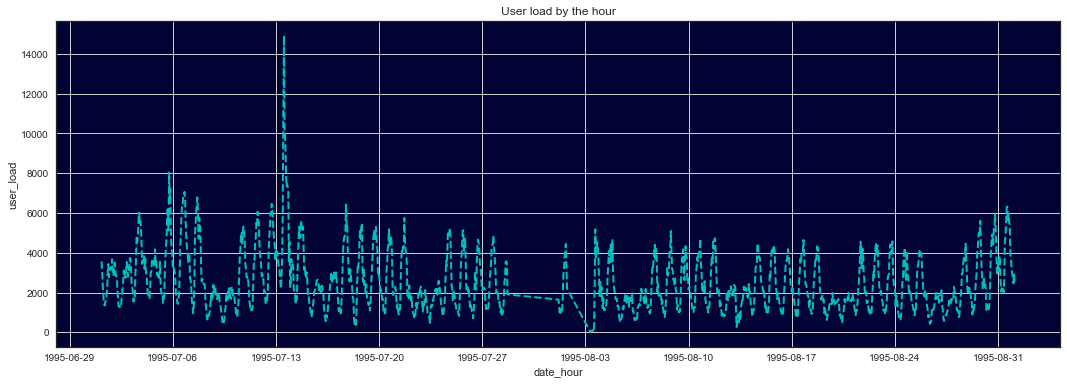

In [95]:
data=ts[['date_hour','no_of_requests']]
data=data.set_index('date_hour')
fig = plt.figure(figsize=[18,6])
ax = fig.add_subplot(111,axisbg='#000333')
plt.plot(data,'c--',ms=2.0,lw=2.0)
plt.ylabel('user_load')
plt.xlabel('date_hour')
plt.title('User load by the hour')
plt.grid()
plt.show()

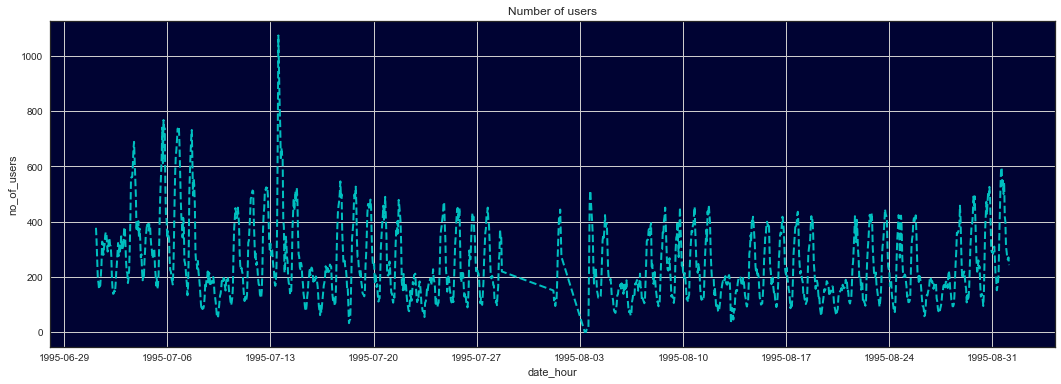

In [137]:
data=ts[['date_hour','no_of_users']]
data=data.set_index('date_hour')
fig = plt.figure(figsize=[18,6])
ax = fig.add_subplot(111,axisbg='#000333')
plt.plot(data,'c--',ms=2.0,lw=2.0)
plt.ylabel('no_of_users')
plt.xlabel('date_hour')
plt.title('Number of users')
plt.grid()
plt.show()

In [140]:
ss1=ts.groupby('hour').agg({'no_of_requests':'mean','no_of_users':'mean'}).reset_index()

In [142]:
ss1.tail()

,hour,no_of_requests,no_of_users
19,19,"4,118.93",397.61
20,20,"3,885.05",373.57
21,21,"3,186.48",309.20
22,22,"2,608.77",248.16
23,23,"2,340.91",223.09


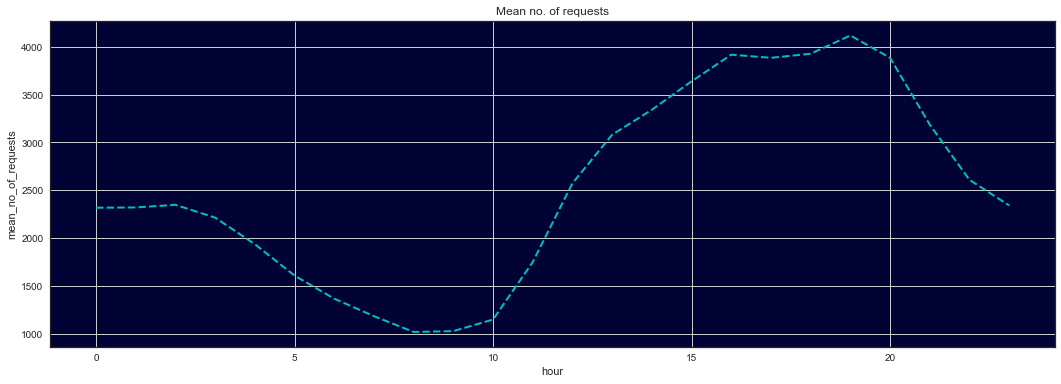

In [151]:
data=ss1[['hour','no_of_requests']]
data=data.set_index('hour')
fig = plt.figure(figsize=[18,6])
ax = fig.add_subplot(111,axisbg='#000333')
plt.plot(data,'c--',ms=2.0,lw=2.0)
plt.ylabel('mean_no_of_requests')
plt.xlabel('hour')
plt.title('Mean no. of requests')
plt.grid()
plt.show()

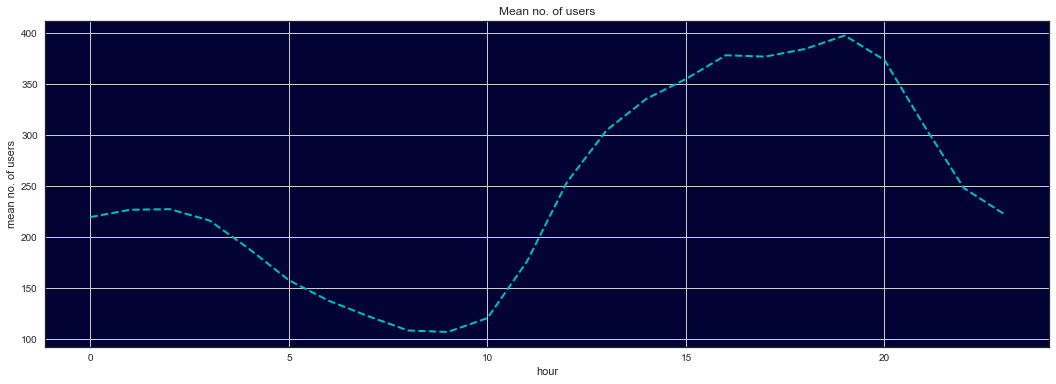

In [152]:
data=ss1[['hour','no_of_users']]
data=data.set_index('hour')
fig = plt.figure(figsize=[18,6])
ax = fig.add_subplot(111,axisbg='#000333')
plt.plot(data,'c--',ms=2.0,lw=2.0)
plt.ylabel('mean no. of users')
plt.xlabel('hour')
plt.title('Mean no. of users')
plt.grid()
plt.show()

In [149]:
ss2=ts.groupby('day_of_week').agg({'no_of_requests':'mean','no_of_users':'mean'}).reset_index()

In [150]:
ss2.head()

,day_of_week,no_of_requests,no_of_users
0,Friday,"2,773.34",274.47
1,Monday,"2,742.14",269.77
2,Saturday,"1,661.55",165.67
3,Sunday,"1,608.19",156.17
4,Thursday,"3,196.09",307.54


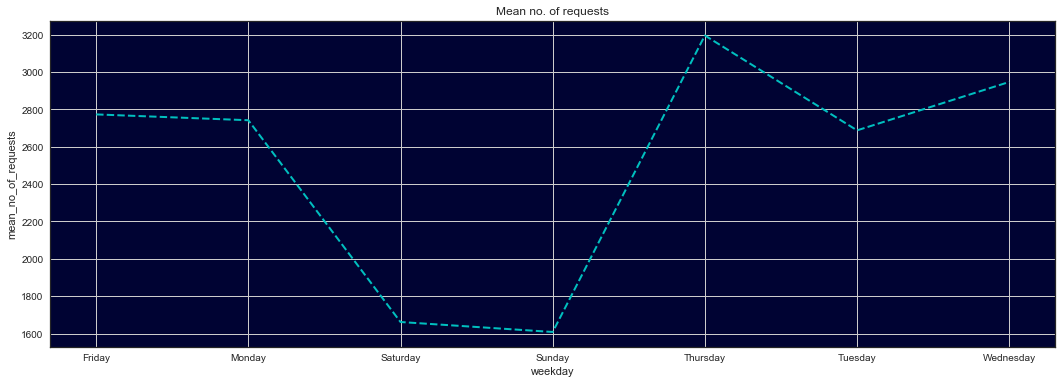

In [154]:
data=ss2[['day_of_week','no_of_requests']]
data=data.set_index('day_of_week')
fig = plt.figure(figsize=[18,6])
ax = fig.add_subplot(111,axisbg='#000333')
plt.plot(data,'c--',ms=2.0,lw=2.0)
plt.ylabel('mean_no_of_requests')
plt.xlabel('weekday')
plt.title('Mean no. of requests')
plt.grid()
plt.show()

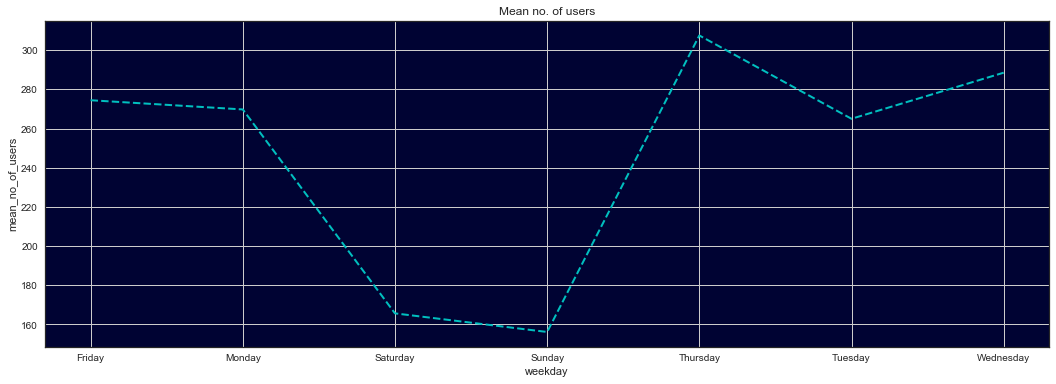

In [156]:
data=ss2[['day_of_week','no_of_users']]
data=data.set_index('day_of_week')
fig = plt.figure(figsize=[18,6])
ax = fig.add_subplot(111,axisbg='#000333')
plt.plot(data,'c--',ms=2.0,lw=2.0)
plt.ylabel('mean_no_of_users')
plt.xlabel('weekday')
plt.title('Mean no. of users')
plt.grid()
plt.show()

### by date

In [106]:
ts_1=df_all.groupby(['date']).agg({'host':['count','nunique'],'bytes':'sum','url':['count','nunique']}).reset_index()
ts_1.columns=['date','no_of_requests','unique_users','data_size_bytes','total_pages','unique_pages']
ts_1['data_size_MB']=ts_1['data_size_bytes']/1024.0
ts_1['data_rate']=ts_1['data_size_MB']/(3600.0*24)

ts_1=ts_1.sort_values(by=['date'],ascending=True)

In [107]:
ts_1.head()

,date,no_of_requests,unique_users,data_size_bytes,total_pages,unique_pages,data_size_MB,data_rate
0,1995-07-01,52123,4243,1303817518,52123,3070,"1,273,259.29",14.74
1,1995-07-02,59070,4781,1519826447,59070,3274,"1,484,205.51",17.18
2,1995-07-03,88868,7268,2056761248,88868,3900,"2,008,555.91",23.25
3,1995-07-04,73121,5816,1840008885,73121,3593,"1,796,883.68",20.80
4,1995-07-05,93899,7152,2057168423,93899,4004,"2,008,953.54",23.25


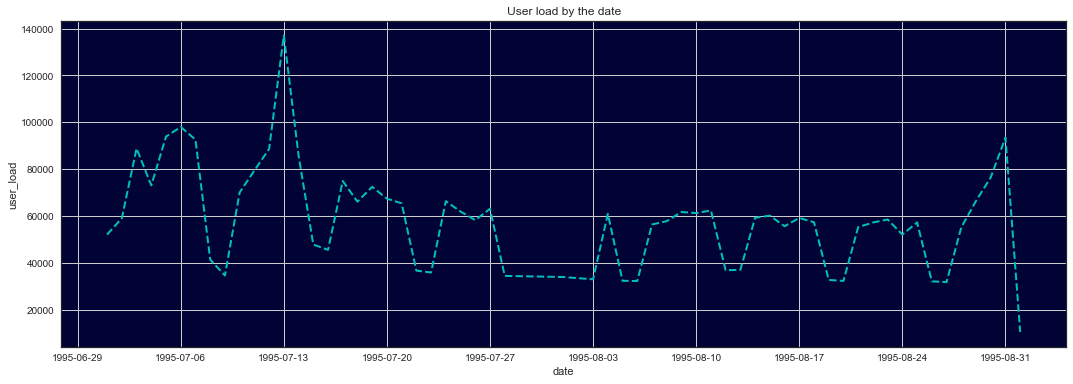

In [105]:
data=ts_1[['date','no_of_requests']]
data=data.set_index('date')
fig = plt.figure(figsize=[18,6])
ax = fig.add_subplot(111,axisbg='#000333')
plt.plot(data,'c--',ms=2.0,lw=2.0)
plt.ylabel('user_load')
plt.xlabel('date')
plt.title('User load by the date')
plt.grid()
plt.show()

In [112]:
ts_2=df_all.groupby(['hour']).agg({'host':'count','bytes':'mean','url':'count'}).reset_index()
ts_2.columns=['hour','total_requests','mean_data_size_bytes','total_pages']
ts_2['mean_data_size_MB']=ts_2['mean_data_size_bytes']/1024.0
ts_2['mean_data_rate']=ts_2['mean_data_size_MB']/3600.0
ts_2=ts_2.sort_values(by=['hour'],ascending=True)

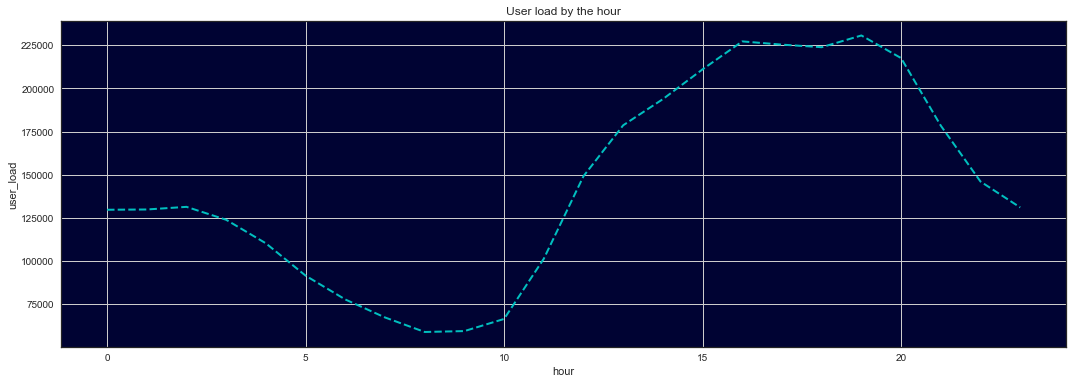

In [113]:
data=ts_2[['hour','total_requests']]
data=data.set_index('hour')
fig = plt.figure(figsize=[18,6])
ax = fig.add_subplot(111,axisbg='#000333')
plt.plot(data,'c--',ms=2.0,lw=2.0)
plt.ylabel('user_load')
plt.xlabel('hour')
plt.title('User load by the hour')
plt.grid()
plt.show()

In [124]:
#number of new users time series
ts_3=df_all[df_all['count']==1].groupby(['date_hour']).agg({'host':'count'}).reset_index()
ts_4=df_all[df_all['count']==1].groupby(['date']).agg({'host':'count'}).reset_index()

In [123]:
ts_3.head()

,date_hour,host
0,1995-07-01 04:01:01,378
1,1995-07-01 05:01:01,266
2,1995-07-01 06:01:01,201
3,1995-07-01 07:01:01,146
4,1995-07-01 08:01:01,132


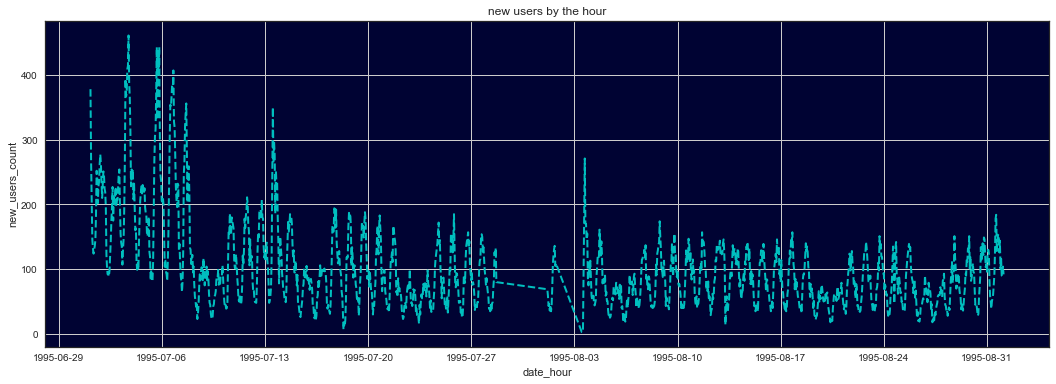

In [127]:
data=ts_3[['date_hour','host']]
data=data.set_index('date_hour')
fig = plt.figure(figsize=[18,6])
ax = fig.add_subplot(111,axisbg='#000333')
plt.plot(data,'c--',ms=2.0,lw=2.0)
plt.ylabel('new_users_count')
plt.xlabel('date_hour')
plt.title('new users by the hour')
plt.grid()
plt.show()

In [125]:
ts_4.head()

,date,host
0,1995-07-01,4243
1,1995-07-02,4248
2,1995-07-03,6378
3,1995-07-04,4524
4,1995-07-05,5654


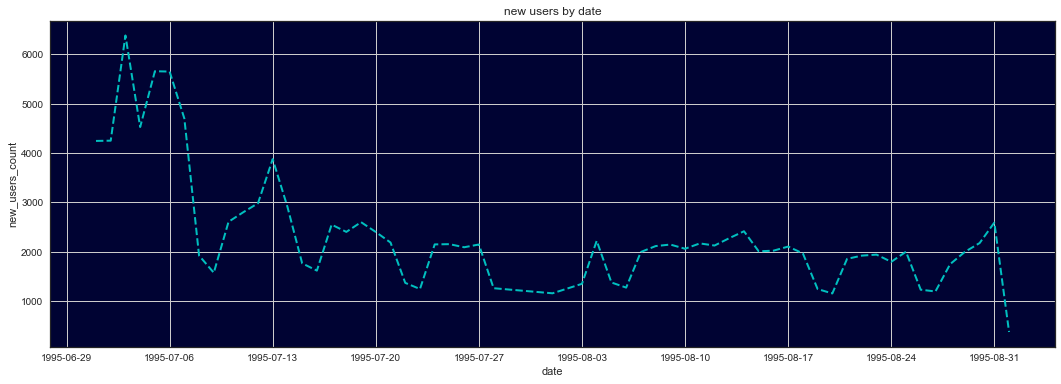

In [128]:
data=ts_4[['date','host']]
data=data.set_index('date')
fig = plt.figure(figsize=[18,6])
ax = fig.add_subplot(111,axisbg='#000333')
plt.plot(data,'c--',ms=2.0,lw=2.0)
plt.ylabel('new_users_count')
plt.xlabel('date')
plt.title('new users by date')
plt.grid()
plt.show()